<a href="https://colab.research.google.com/github/joohoshin/Python_Basic/blob/master/17_2_Concat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concat

데이터프레임을 합칠때 사용합니다. 
특히, 여러개의 데이터를 합칠 때 유용합니다.

코로나 데이터를 살펴봅시다

https://www.kaggle.com/aestheteaman01/covcsd-covid19-countries-statistical-dataset

In [ ]:
from google.colab import drive
drive.mount('/g')

Mounted at /g


In [ ]:
# 파일을 불러봅시다
import pandas as pd

# 연습을 위해서 3개 정도의 파일을 불러옵니다
df1 = pd.read_csv('/g/My Drive/Python_202002/covid/India_COVID19.csv')
df2 = pd.read_csv('/g/My Drive/Python_202002/covid/South-Korea_COVID19.csv')
df3 = pd.read_csv('/g/My Drive/Python_202002/covid/Italy_COVID19.csv')



In [ ]:
df1.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Min_temperature,Max_temperature,Wind_speed,Precipitation,Fog_Presence,Population,Population Density/km,Median_Age,Sex_Ratio,Age%_65+,Hospital Beds/1000,Available Beds/1000,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),In_travels(mill.),Domestic_Travels (mill.)
0,22-01-2020,NaN,India,0,0,0,0,21,78,26.28,17.61,29.78,1.9,0.0,0,1380004385,464,28,1.08,6.39,0.7,0.175,0.0,87.54,106.89,67.8,70.5,47951,NaN,"17,423",NaN
1,23-01-2020,NaN,India,0,0,0,0,21,78,27.11,18.39,31.00,1.9,0.0,0,1380004385,464,28,1.08,6.39,0.7,0.175,0.0,87.54,106.89,67.8,70.5,47951,NaN,"17,423",NaN
2,24-01-2020,NaN,India,0,0,0,0,21,78,25.22,15.61,29.39,1.9,0.0,0,1380004385,464,28,1.08,6.39,0.7,0.175,0.0,87.54,106.89,67.8,70.5,47951,NaN,"17,423",NaN
3,25-01-2020,NaN,India,0,0,0,0,21,78,25.33,15.39,28.00,1.9,0.0,0,1380004385,464,28,1.08,6.39,0.7,0.175,0.0,87.54,106.89,67.8,70.5,47951,NaN,"17,423",NaN
4,26-01-2020,NaN,India,0,0,0,0,21,78,24.94,14.00,30.50,0.7,0.0,0,1380004385,464,28,1.08,6.39,0.7,0.175,0.0,87.54,106.89,67.8,70.5,47951,NaN,"17,423",NaN


In [ ]:
df1.describe()

,State,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Min_temperature,Max_temperature,Wind_speed,Precipitation,Fog_Presence,Population,Population Density/km,Median_Age,Sex_Ratio,Age%_65+,Hospital Beds/1000,Available Beds/1000,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),Domestic_Travels (mill.)
count,0.0,69.00000,69.000000,69.000000,69.000000,69.0,69.0,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,6.900000e+01,69.0,69.0,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01,69.000000,6.900000e+01,6.900000e+01,6.900000e+01,69.0,69.0,0.0,0.0
mean,NaN,129.57971,2.768116,18.130435,0.463768,21.0,78.0,27.896667,17.439565,31.992029,1.902899,0.016812,0.014493,1.380004e+09,464.0,28.0,1.080000e+00,6.390000e+00,7.000000e-01,1.750000e-01,0.000094,8.754000e+01,1.068900e+02,6.780000e+01,70.5,47951.0,NaN,NaN
std,NaN,276.09815,6.736959,41.179633,1.367476,0.0,0.0,3.074819,2.790687,3.394250,0.502046,0.090740,0.120386,0.000000e+00,0.0,0.0,1.342028e-15,8.946853e-15,7.828496e-16,1.957124e-16,0.000200,2.862993e-14,1.288347e-13,1.002048e-13,0.0,0.0,NaN,NaN
min,NaN,0.00000,0.000000,0.000000,-1.000000,21.0,78.0,21.500000,11.220000,24.780000,0.500000,0.000000,0.000000,1.380004e+09,464.0,28.0,1.080000e+00,6.390000e+00,7.000000e-01,1.750000e-01,0.000000,8.754000e+01,1.068900e+02,6.780000e+01,70.5,47951.0,NaN,NaN
25%,NaN,3.00000,0.000000,0.000000,0.000000,21.0,78.0,25.330000,15.390000,29.500000,1.900000,0.000000,0.000000,1.380004e+09,464.0,28.0,1.080000e+00,6.390000e+00,7.000000e-01,1.750000e-01,0.000002,8.754000e+01,1.068900e+02,6.780000e+01,70.5,47951.0,NaN,NaN
50%,NaN,3.00000,0.000000,0.000000,0.000000,21.0,78.0,28.220000,17.220000,33.000000,1.900000,0.000000,0.000000,1.380004e+09,464.0,28.0,1.080000e+00,6.390000e+00,7.000000e-01,1.750000e-01,0.000002,8.754000e+01,1.068900e+02,6.780000e+01,70.5,47951.0,NaN,NaN
75%,NaN,82.00000,2.000000,11.000000,0.000000,21.0,78.0,29.780000,19.000000,34.000000,1.900000,0.000000,0.000000,1.380004e+09,464.0,28.0,1.080000e+00,6.390000e+00,7.000000e-01,1.750000e-01,0.000059,8.754000e+01,1.068900e+02,6.780000e+01,70.5,47951.0,NaN,NaN
max,NaN,1251.00000,32.000000,227.000000,8.000000,21.0,78.0,34.780000,23.220000,39.390000,4.500000,0.710000,1.000000,1.380004e+09,464.0,28.0,1.080000e+00,6.390000e+00,7.000000e-01,1.750000e-01,0.000906,8.754000e+01,1.068900e+02,6.780000e+01,70.5,47951.0,NaN,NaN


In [ ]:
# concat 안에 합칠 데이터를 리스트 형태로 넣어줍니다. 
# 인덱스를 0부터 이어지도록 하기 위해서는 ignore_index=True를 넣어줍니다. 
df = pd.concat([df1, df2, df3], ignore_index=True)

In [ ]:
df

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Min_temperature,Max_temperature,Wind_speed,Precipitation,Fog_Presence,Population,Population Density/km,Median_Age,Sex_Ratio,Age%_65+,Hospital Beds/1000,Available Beds/1000,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),In_travels(mill.),Domestic_Travels (mill.)
0,22-01-2020,NaN,India,0,0,0,0,21,78,26.28,17.61,29.78,1.9,0.00,0,1380004385,464,28,1.08,6.39,0.7,0.175,0.000000,87.54,106.89,67.8,70.5,47951,NaN,"17,423",NaN
1,23-01-2020,NaN,India,0,0,0,0,21,78,27.11,18.39,31.00,1.9,0.00,0,1380004385,464,28,1.08,6.39,0.7,0.175,0.000000,87.54,106.89,67.8,70.5,47951,NaN,"17,423",NaN
2,24-01-2020,NaN,India,0,0,0,0,21,78,25.22,15.61,29.39,1.9,0.00,0,1380004385,464,28,1.08,6.39,0.7,0.175,0.000000,87.54,106.89,67.8,70.5,47951,NaN,"17,423",NaN
3,25-01-2020,NaN,India,0,0,0,0,21,78,25.33,15.39,28.00,1.9,0.00,0,1380004385,464,28,1.08,6.39,0.7,0.175,0.000000,87.54,106.89,67.8,70.5,47951,NaN,"17,423",NaN
4,26-01-2020,NaN,India,0,0,0,0,21,78,24.94,14.00,30.50,0.7,0.00,0,1380004385,464,28,1.08,6.39,0.7,0.175,0.000000,87.54,106.89,67.8,70.5,47951,NaN,"17,423",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,26-03-2020,NaN,Italy,80589,8215,6203,712,43,12,6.06,3.00,7.39,12.6,0.01,1,60461826,206,47,0.93,21.69,3.4,0.850,1.332891,12.78,22.78,79.7,85.2,541423,61.195,93,NaN
203,27-03-2020,NaN,Italy,86498,9134,5909,919,43,12,8.78,6.39,10.00,11.3,0.00,0,60461826,206,47,0.93,21.69,3.4,0.850,1.430622,12.78,22.78,79.7,85.2,541423,61.195,93,NaN
204,28-03-2020,NaN,Italy,92472,10023,5974,889,43,12,12.94,6.78,17.00,2.2,0.00,0,60461826,206,47,0.93,21.69,3.4,0.850,1.529428,12.78,22.78,79.7,85.2,541423,61.195,93,NaN
205,29-03-2020,NaN,Italy,97689,10779,5217,756,43,12,11.44,1.00,18.00,1.9,0.00,0,60461826,206,47,0.93,21.69,3.4,0.850,1.615714,12.78,22.78,79.7,85.2,541423,61.195,93,NaN


In [ ]:
# 데이터가 없는게 많은 컬럼을 삭제해봅시다
nan_count = df.isnull().sum()
nan_count


Date                          0
State                       207
Country                       0
Cumulative_cases              0
Cumulative_death              0
Daily_cases                   0
Daily_death                   0
Latitude                      0
Longitude                     0
Temperature                   0
Min_temperature               0
Max_temperature               0
Wind_speed                    0
Precipitation                 0
Fog_Presence                  0
Population                    0
Population Density/km         0
Median_Age                    0
Sex_Ratio                     0
Age%_65+                      0
Hospital Beds/1000            0
Available Beds/1000           0
Confirmed Cases/1000          0
Lung Patients (F)             0
Lung Patients (M)             0
Life Expectancy (M)           0
Life Expectancy (F)           0
Total_tests_conducted         0
Out_Travels (mill.)          69
In_travels(mill.)             0
Domestic_Travels (mill.)    138
dtype: i

In [ ]:
nan_list = nan_count[nan_count>100].index
nan_list

Index(['State', 'Domestic_Travels (mill.)'], dtype='object')

In [ ]:
df = df.drop(nan_list, axis=1)

In [ ]:
# 날짜를 변환해봅시다
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')
df['Date']


0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
202   2020-03-26
203   2020-03-27
204   2020-03-28
205   2020-03-29
206   2020-03-30
Name: Date, Length: 207, dtype: datetime64[ns]

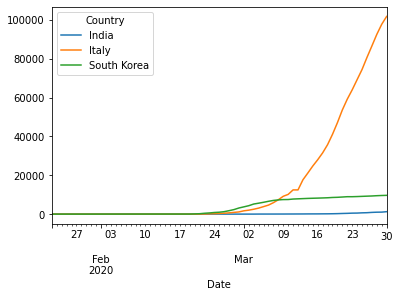

In [ ]:
# 국가별/날짜별 누적확진자수 그래프를 그려봅시다
summary = pd.pivot_table(df, values='Cumulative_cases', index=['Date'],
                    columns=['Country'], aggfunc='mean')
summary.plot()
